In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df_sum = df.sum().drop('scenario')

In [13]:
df_sum

alarms    24603
false      4495
true      20108
dtype: object

In [21]:
df = pd.DataFrame({'false': [4495], 'true': [20108]}, index=['alarms'])
df

false   true
alarms   4495  20108

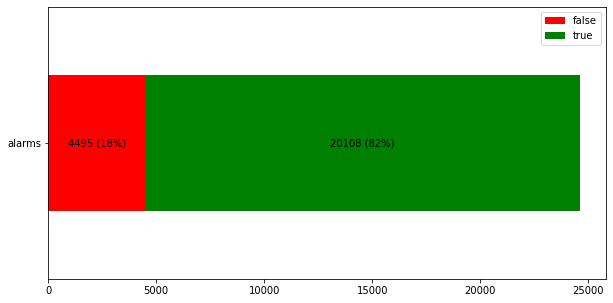

In [45]:
ax = df.plot.barh(figsize=(10,5),stacked = True, color={'true':"green",'false': 'red' })
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f} ({:.0f}%)'.format(width, width*100/24503),
            horizontalalignment='center',
            verticalalignment='center')

In [30]:
ax.bar_label(ax.containers[0])

[Text(0, 0, '4495')]

In [33]:
ax

<AxesSubplot:>

In [62]:
df = pd.read_csv('results.csv')
df['scenario_file'] = df['scenario']
df['scenario'] = df['scenario'].str.split('_')
df['scenario'] = df['scenario'].map(lambda x: '_'.join(x[-2:]).replace('LID-DS-2021-sorted_','').replace('.json','').replace('_','-'))

In [63]:
df

scenario  alarms  false  true  \
0     Bruteforce-CWE-307      22      3    19   
1          CVE-2014-0160      18     18     0   
2          CVE-2017-7529     119    119     0   
3          CVE-2018-3760     301     22   279   
4          CVE-2019-5418      25     25     0   
..                   ...     ...    ...   ...   
73  CWE-89-SQL-injection    1071      1  1070   
74           EPS-CWE-434     456      9   447   
75            Juice-Shop      99     16    83   
76           PHP-CWE-434     247      3   244   
77               ZipSlip    1190     62  1128   

                                        scenario_file  
0   ./alarms_n_3_w_100_t_False_LID-DS-2021-sorted_...  
1   ./alarms_n_3_w_100_t_False_LID-DS-2021-sorted_...  
2   ./alarms_n_3_w_100_t_False_LID-DS-2021-sorted_...  
3   ./alarms_n_3_w_100_t_False_LID-DS-2021-sorted_...  
4   ./alarms_n_3_w_100_t_False_LID-DS-2021-sorted_...  
..                                                ...  
73  ./alarms_n_7_w_100_t_True_LID-DS-2021-sorted_C...  
74  ./alarms_n_7_w_100_t_True_LID-DS-2021-sorted_E...  
75  ./alarms_n_7_w_100_t_True_LID-DS-2021-sorted_J...  
76  ./alarms_n_7_w_100_t_True_LID-DS-2021-sorted_P...  
77  ./alarms_n_7_w_100_t_True_LID-DS-2021-sorted_Z...  

[78 rows x 5 columns]

In [68]:
df_sum = df.groupby('scenario').sum()

In [72]:
df_sum = df_sum.drop('alarms', axis=1)

In [71]:
df_sum

alarms  false  true
scenario                                 
Bruteforce-CWE-307      1010    308   702
CVE-2014-0160            495     63   432
CVE-2017-7529            724    486   238
CVE-2018-3760           1686    364  1322
CVE-2019-5418            459    176   283
CVE-2020-13942          1428    402  1026
CVE-2020-23839          3637    156  3481
CVE-2020-9484           2270   1620   650
CWE-89-SQL-injection    5310    305  5005
EPS-CWE-434             2090     63  2027
Juice-Shop               683     85   598
PHP-CWE-434             1635    339  1296
ZipSlip                 3176    128  3048

"for p in ax.patches:\n    width, height = p.get_width(), p.get_height()\n    x, y = p.get_xy()\n    ax.text(x+width/2,\n            y+height/2,\n            '{:.0f} ({:.0f}%)'.format(width, width*100/24503),\n            horizontalalignment='center',\n            verticalalignment='center')"

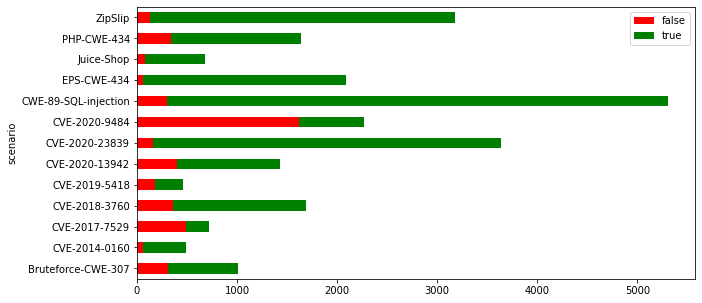

In [76]:
ax = df_sum.plot.barh(figsize=(10,5),stacked = True, color={'true':"green",'false': 'red' })
'''for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f} ({:.0f}%)'.format(width, width*100/24503),
            horizontalalignment='center',
            verticalalignment='center')'''